# Введение в искусственные нейронные сети
# Урок 3. TensorFlow

## Содержание методического пособия:


<ol>
<li>Что такое TensorFlow</li>
<li>Основы синтаксиса TensorFlow</li>
<li>Пример нейросети на TensorFlow</li>
</ol>

## Что такое TensorFlow

TensorFlow - это фреймворк для создания ML моделей. TensorFlow предназначен в первую очередь для Deep Learning, т.е. создания современных нейросетей. Однако в TensorFlow также есть поддержка некоторых классических ML алгоритмов: K-means clustering, Random Forests, Support Vector Machines, Gaussian Mixture Model clustering, Linear/logistic regression.

TensorFlow выпустила компания Google в 2015. TensorFlow - это opensource проект. На данный момент это один из основных инструментов для создания нейросетей в рабочих целях. TensorFlow позволяет создавать нейронные сети как для кластеров из большого количества вычислительных устройств, так и для устройств с относительно небольшой вычислитей мощностью, таких как смартфоны и одноплатные компьютеры.

TensorFlow применяется самой компанией Google для ее поиска, почты, переводчика, распознования голоса, внутренних нужд наподобие мониторинга оборудования. TensorFlow используется различными компаниями для различных проектов, связанных с компьютерным зрением, решением задач ранжирования и т.д.


<img src="https://drive.google.com/uc?export=view&id=1YSzD1P42f8aEjE7V6bKcu3kc2oLsOFaY" width=600px />

## Основы синтаксиса TensorFlow

Процесс создания нейросети на TensorFlow схож с разобранным нами процессом обучения нейросети на Keras. Отличее здесь в том, что здесь нам нужно прописать больше деталей в коде.

Особенностью TensorFlow версии 1 является то, что сначала необходимо декларировать переменные и вычисления, которые будут совершены над ними, а потом уже непосредственно запускать работу над данными.
Tf версии 1 менее дружественный к разработчикам.

Давайте рассмотрим базовые вещи в синтаксисе Tensorflow 2.

In [1]:
#!pip install tensorflow

In [2]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.18.0


In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found



Название TensorFlow означает поток тензоров. Тензоры - это массивы. Данные в компьютере представлены часто в виде массивах и работа с этими массивами подразумевает их преобразования. Преобразования осуществляются через, к примеру, математические операции. Работа TensorFlow складывается из цепочки преобразований тензоров, т.е. данных. Сами операции осуществляющие преобразование данных представлены в TensorFlow в виде графов.

<img src='https://drive.google.com/uc?export=view&id=1pDiSoBIL8IBpIFq3R4OKGRW3YseBRvFm'>


Визуализизация тензора с более чем двумя осями:

<img src='https://drive.google.com/uc?Export=view&id=1C6pu0iDx1Ugz2OMyE9d6KZH9IcN3-STG'>
<img src='https://drive.google.com/uc?export=view&id=1cmVLwGNLc8fkDpmNZreTecMNCXgD6zGl'>
<img src='https://drive.google.com/uc?export=view&id=1XiGSZVsVQrlH279eu2IK1bekSvccX6aT'>

Все тензоры неизменны, как числа и строки Python: вы никогда не можете обновить содержимое тензора, только создать новый.

Пример создания тензора «скаляра» или «ранга 0». Скаляр содержит одно значение и не содержит «осей».



In [5]:
tf.constant(3)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

Тензор «вектора» или «ранга 1» подобен списку значений. Вектор имеет одну ось.



In [6]:
tf.constant([2.0, 3.0, 4.0])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

Тензор «матрицы» или «ранга 2» имеет две оси.



In [7]:
A = tf.constant([[3, 2], [5, 2]])

A

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[3, 2],
       [5, 2]], dtype=int32)>

Вы можете преобразовать тензор в массив NumPy либо с помощью np.array либо с tensor.numpy метода tensor.numpy.

In [8]:
display(np.array(A), A.numpy())

array([[3, 2],
       [5, 2]], dtype=int32)

array([[3, 2],
       [5, 2]], dtype=int32)

Пример сложения и поэлементного умножения тензоров.

In [9]:
B = tf.constant([[9, 5],
                 [1, 3]])


print(tf.add(A, B), "\n")
print(A + B, "\n")


print(tf.multiply(A, B), "\n")
print(A * B, "\n")


AB = tf.concat(values=[A, B], axis=0)
print(AB.numpy())

tf.Tensor(
[[12  7]
 [ 6  5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[12  7]
 [ 6  5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[27 10]
 [ 5  6]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[27 10]
 [ 5  6]], shape=(2, 2), dtype=int32) 

[[3 2]
 [5 2]
 [9 5]
 [1 3]]


Пример изменения размерности тензора.

In [10]:
tensor = tf.constant([[3, 2],
                      [5, 2],
                      [9, 5],
                      [1, 3]])

resh_tensor = tf.reshape(tensor=tensor, shape=(1, 8))

print(f'BEFORE {tensor.numpy()}')
print(f'AFTER {resh_tensor.numpy()}')

BEFORE [[3 2]
 [5 2]
 [9 5]
 [1 3]]
AFTER [[3 2 5 2 9 5 1 3]]


Пример матричного умножения.

In [11]:
A = tf.constant([[3, 7],
                 [1, 9],
                 [1, 2]])


B = tf.constant([[10, 10],
                 [1, 1]])

print(A.shape, B.shape, "\n")

print(tf.matmul(A, B), "\n")
print(A @ B, "\n")

(3, 2) (2, 2) 

tf.Tensor(
[[37 37]
 [19 19]
 [12 12]], shape=(3, 2), dtype=int32) 

tf.Tensor(
[[37 37]
 [19 19]
 [12 12]], shape=(3, 2), dtype=int32) 



In [12]:
x = tf.random.uniform([3, 3])

print("есть ли доступные GPU:"),
print(tf.config.list_physical_devices("GPU"))

print("\nгде находится тензор")
print(x.device)

есть ли доступные GPU:
[]

где находится тензор
/job:localhost/replica:0/task:0/device:CPU:0


In [13]:
import time

def time_matmul(x):
  start = time.time()
  for loop in range(10):
    tf.matmul(x, x)

  result = time.time() - start

  print("10 циклов: {:0.2f}ms".format(1000 * result))

# исполнение CPU
print("CPU:")
with tf.device("CPU:0"):
  x = tf.random.uniform([1000, 1000])
  assert x.device.endswith("CPU:0")
  time_matmul(x)

# исполнение на GPU #0 , если доступен
if tf.config.list_physical_devices("GPU"):
  print("GPU:")
  with tf.device("GPU:0"): # или GPU:1 , для 2х GPU, GPU:2 для 3х  и т.д.
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("GPU:0")
    time_matmul(x)

CPU:
10 циклов: 1426.54ms


In [14]:
import time

def time_matmul(x):
  start = time.time()
  for loop in range(10):
    tf.matmul(x, x)

  result = time.time() - start

  print("10 циклов: {:0.2f}ms".format(1000 * result))

# исполнение CPU
print("CPU:")
with tf.device("CPU:0"):
  x = tf.random.uniform([1000, 1000])
  assert x.device.endswith("CPU:0")
  time_matmul(x)

# исполнение на GPU #0 , если доступен
if tf.config.list_physical_devices("GPU"):
  print("GPU:")
  with tf.device("GPU:0"): # или GPU:1 , для 2х GPU, GPU:2 для 3х  и т.д.
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("GPU:0")
    time_matmul(x)

CPU:
10 циклов: 1592.26ms


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [16]:
import matplotlib.pyplot as plt

### Оптимизаторы

In [17]:
from tensorflow.keras.optimizers import Adam, SGD

# Классификация изображений одежды

Давайте разберем использование tensorflow 2 на примере датасета с одеждой. В этом датасете будут находиться маленькие изображения на белом фоне, такие как кросовки, футболки и прочее.

В данном случае мы будем использовать High API от TensorFlow

In [18]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.18.0


Мы будет использовать следующий датасет -  [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) Этот датасет содержит 70.000 черно-белых изображений в 10 категориях. Изображения имеют разрешение 28x28 пикселей.

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Долгое время в машинном обучение для программ Hello world использовался датасет MNIST с рукописными цифрами. Данный датасет призван несколько усложнить задачу распознования но также подходит в качестве программы Hello world.

В этом датасете 60 000 тренировочных изображений и 10 000 тестовых.

In [19]:
from keras.datasets import fashion_mnist

(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [20]:
class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

Давайте посмотрим структуры полученного массива данных:

In [21]:
X_train.shape

(60000, 28, 28)

In [22]:
len(y_train_labels)

60000

In [23]:
y_train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Проанализируем тестовую выборку:

In [24]:
X_test.shape

(10000, 28, 28)

In [25]:
len(y_test_labels)

10000

In [26]:
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

In [27]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Подготовка данных

Давайте взглянем на конкретный пример изображений с помощью matplotlib:

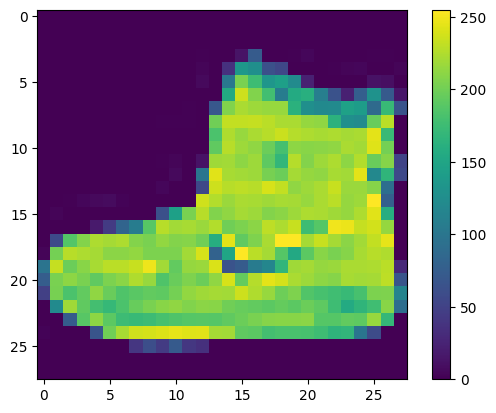

In [28]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.show()

Для процесса обучения нейронной сети нам важно перевести данные из диапазона от 0 до 255 в диапазон от 0 до 1:

In [29]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Посмотрим первые 25 изображений:

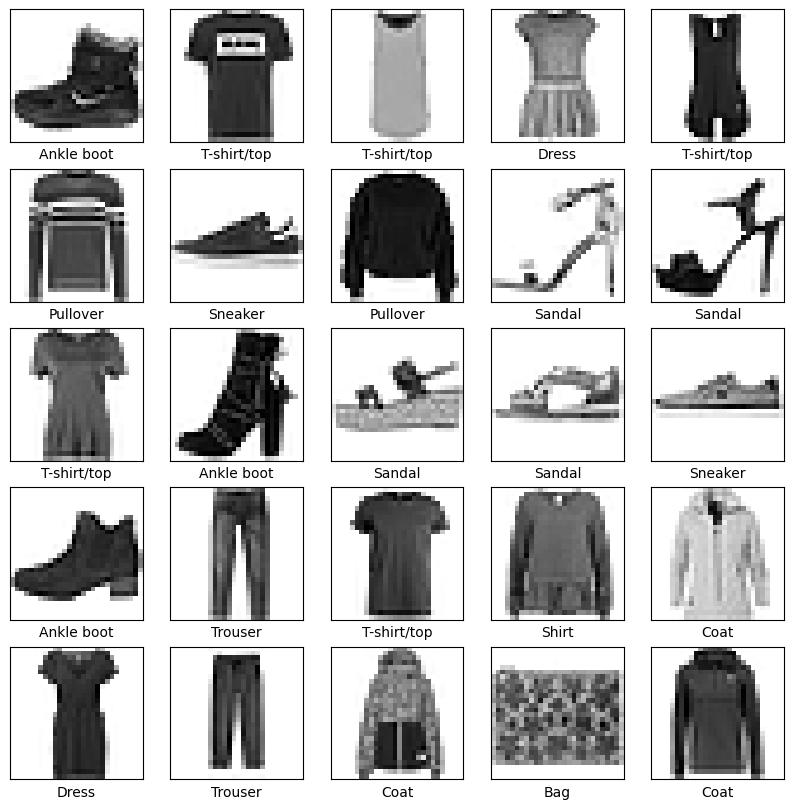

In [30]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_labels[i]])
plt.show()

## Построение модели

Построение нейронной сети подразумевает конфигурацию ее слоев и последующую компиляцию.

### Определение слоев

Давайте создадим 3 слоя нейронной сети с помощью функционала Keras.layers

In [31]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

Соберем модель в функциональной форме (функциональное API Keras)

Сеть собираем как последовательности соединей узлов:

 вход -> слой 1 -> слой 2 -> выход

 связь идет через тензоры

In [32]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Первый слой, `tf.keras.layers.Flatten`, трасформирует двумерный массив на входе в одномерный массив.

Получившиеся 784 (28 x 28) входных нейрона присоединяем к полносвязному слою из 128 нейронов , которые будут использовать функцию активации relu. В выходном слое будет 10 нейронов, по числу классов, которые он должен предсказывать.

In [33]:
inputs = Input(shape=(28, 28))
x_1 = Flatten()(inputs)
x_2 = Dense(128, activation='relu')(x_1)
outputs = Dense(10)(x_2)

x_1, x_2, outputs

(<KerasTensor shape=(None, 784), dtype=float32, sparse=False, name=keras_tensor_5>,
 <KerasTensor shape=(None, 128), dtype=float32, sparse=False, name=keras_tensor_6>,
 <KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_7>)

In [34]:
model = Model(inputs, outputs)

In [35]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


### Компиляция модели

Давайте вспомним ключевые понятия, которые нам понадобяться при компиляции:

* *Loss function* — меряет как точно работает нейросеть.
* *Optimizer* — определяет способ корректировки весов.
* *Metrics* — определяет за какие характеристики будут отражаться в процессе обучения.

In [36]:
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy

model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Тренировка модели

Здесь все стандартно - данные передаются в нейросеть и сопоставляются изображения и лейблы.



### Передача данных в модель

Команда непосредственно запускающая процесс обучения называется - `model.fit`:

In [37]:
model.fit(X_train, y_train,
          epochs=5,
          batch_size=256,
          validation_data=(X_test, y_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7085 - loss: 0.8646 - val_accuracy: 0.8265 - val_loss: 0.4921
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8480 - loss: 0.4411 - val_accuracy: 0.8392 - val_loss: 0.4516
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8626 - loss: 0.3978 - val_accuracy: 0.8503 - val_loss: 0.4182
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8697 - loss: 0.3680 - val_accuracy: 0.8581 - val_loss: 0.3982
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8779 - loss: 0.3475 - val_accuracy: 0.8666 - val_loss: 0.3836


In [38]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8666 - loss: 0.3836

Test accuracy: 0.866599977016449


В выводе выше мы следим за точностью в процессе обучения, проверяем точность на тестовых данных и меняем параметры нейросети если точность на тестовых данных нас не устраивает.

На данный момент наша модель отвечает линейно:

In [39]:
model.predict(X_test[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[ -5.2798967, -10.28961  ,  -6.820895 ,  -6.125845 ,  -7.134352 ,
          3.279038 ,  -4.949872 ,   3.3423345,  -0.968655 ,   5.0575933]],
      dtype=float32)

In [40]:
y_test[:1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [41]:
# мультилейбл - sigmoid
# мультикласс - softmax

### Предсказания нейросети

Команды ниже позволяют проверить работу натренированной ранее нейросети.

**Softmax**

<img src='https://drive.google.com/uc?export=view&id=1dW-Hk-qogTWG-x3bkzlM5aHsWhxe3juX'>

In [42]:
probability_model = Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [43]:
predictions = probability_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [44]:
predictions[0]

array([2.39732926e-05, 1.59969545e-07, 5.13429677e-06, 1.02881440e-05,
       3.75274044e-06, 1.24975935e-01, 3.33469106e-05, 1.33142173e-01,
       1.78680336e-03, 7.40018487e-01], dtype=float32)

In [45]:
np.argmax(predictions[0])

np.int64(9)

In [46]:
y_test_labels[0]

np.uint8(9)

In [47]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### Проверка предсказаний

Matplotlib нам дает возможность посмотреть наше предсказание графически:

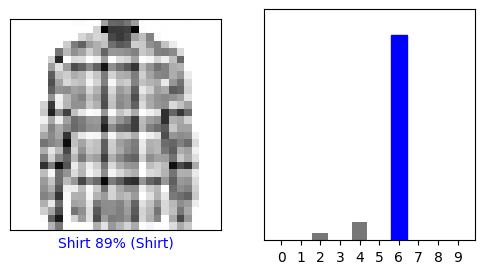

In [48]:
i = 7
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test_labels, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test_labels)
plt.show()

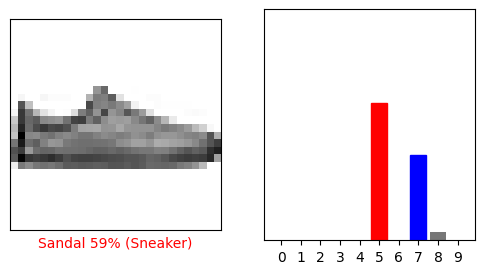

In [49]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test_labels, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test_labels)
plt.show()

Давайте сделаем еще несколько предсказаний -

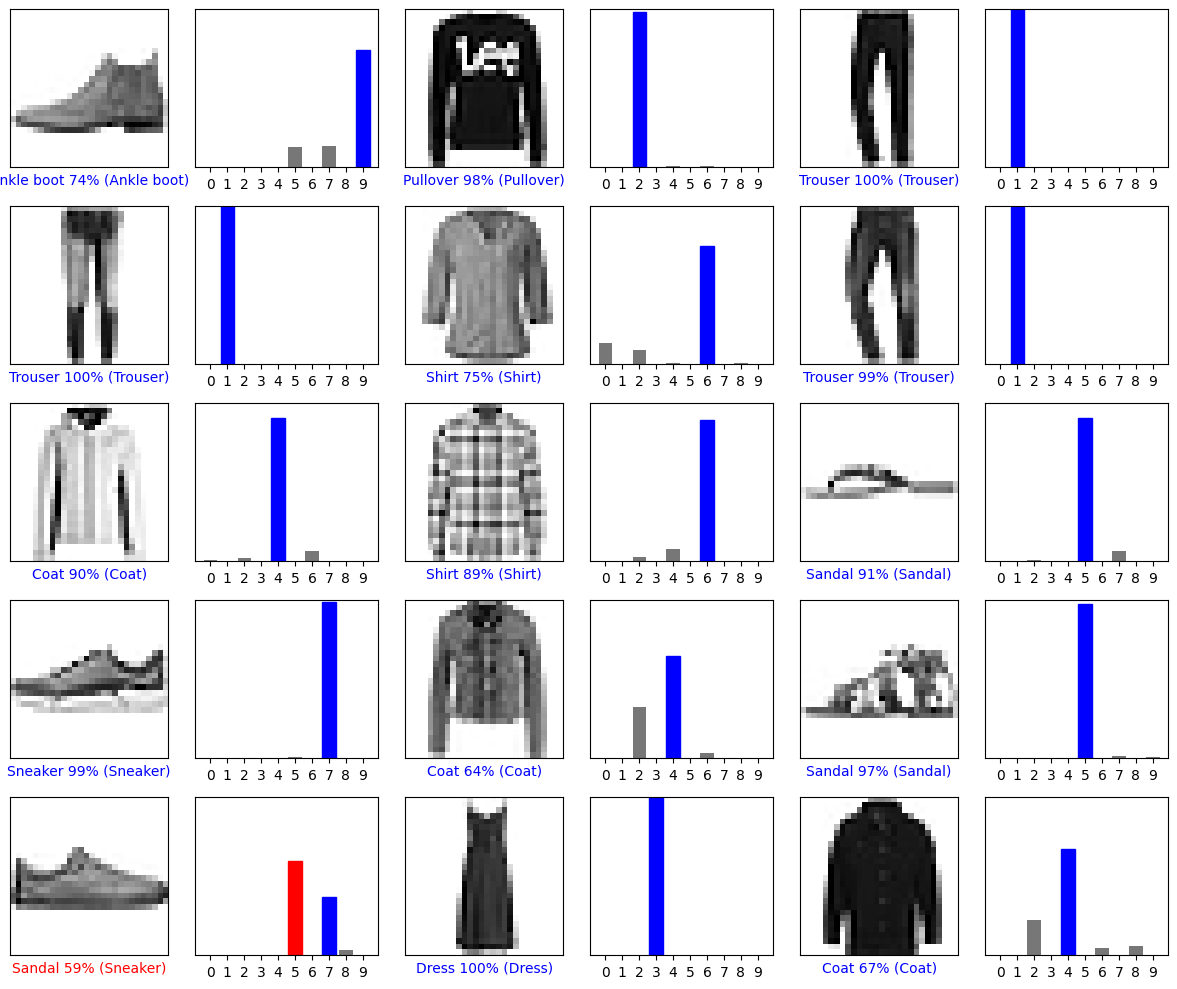

In [50]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, y_test_labels, X_test)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, y_test_labels)

plt.tight_layout()
plt.show()

## Использование полученной модели

Давайте возьмем одно изображение из тестовой выборки и посмотрим предсказание нейронной сети.

In [51]:
i = 0
img = X_test[i]

print(img.shape)

(28, 28)


In [52]:
# Add the image to a batch where it's the only member
imgs = np.expand_dims(img, 0)

print(imgs.shape)

print(img.reshape((1, img.shape[0], img.shape[0])).shape)
print(img[None].shape)

(1, 28, 28)
(1, 28, 28)
(1, 28, 28)


In [53]:
predictions_single = probability_model.predict(imgs)

predictions_single

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[2.39732981e-05, 1.59969417e-07, 5.13429313e-06, 1.02881468e-05,
        3.75273430e-06, 1.24975786e-01, 3.33469179e-05, 1.33142039e-01,
        1.78680115e-03, 7.40018666e-01]], dtype=float32)

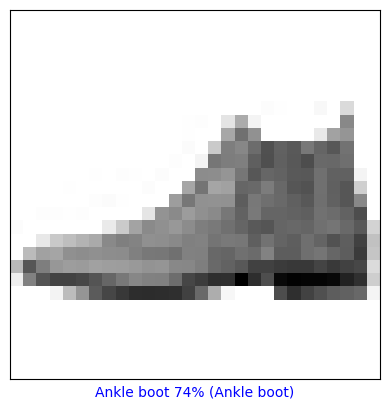

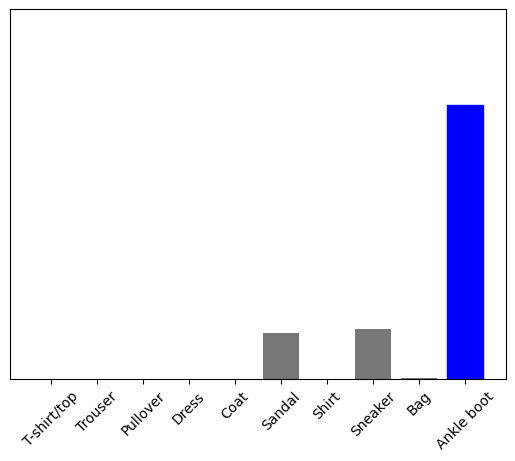

In [54]:
plot_image(i, predictions, y_test_labels, X_test)
plt.show()
plot_value_array(i, predictions_single, y_test_labels)
plt.xticks(range(10), class_names, rotation=45);

`keras.Model.predict` возвращает список списков — по одному списку для каждого предсказания в батче. Нам нужны предсказания только для одного изображения:

In [55]:
np.argmax(predictions_single[0])

np.int64(9)

## **Проведем анализ работы модели по слоям**

Состояние узлов в сети по эпохам (пакетам) и слоям можно оценить используя средства tensorflow через объект GradientTape() - исполняет шаг вычисления градиента для модели по ее loss для всех тренируемых весов модели (<имя модели>.trainable_weights) (см. https://www.tensorflow.org/guide/basic_training_loops, https://www.tensorflow.org/api_docs/python/tf/GradientTape)


данные для обучения получим из tensorflow.data.Dataset (https://www.tensorflow.org/guide/data), куда передаем выборку , а на выходе получаем генератор пакетов заданного размера

Начнем с простого примера, который рассматривали на первом вебинаре, когда изучали граф вычислений.

[Ссылка](https://docs.google.com/presentation/d/1Sfj8l91QFkFA6kMCe4CStCRDH5-pmfnZc8AEe8ujudg/edit) на презентацию.

1. Взять батч объектов
2. Получить предсказания модель на объктах
3. Посчитать ошибку предсказания
4. Посчитать градиенты
5. Сделать шаг оптимизации

In [56]:
inputs = Input(shape=(1))
outputs = Dense(1, activation='sigmoid')(inputs)
model_toy = Model(inputs=inputs, outputs=outputs)

# Создадим экземпляр оптимизатора
optimizer = Adam(learning_rate=0.01)

# Создадим экспемпляр функции потерь
loss_fn = tf.keras.losses.MeanSquaredError()

model_toy.summary()

ValueError: Cannot convert '1' to a shape.

In [ ]:
model_toy.get_weights()

In [ ]:
# зададим начальные значения весов
params = [np.empty(shape = (1,1), dtype = np.float32), np.empty(shape = (1,), dtype = np.float32)]
params[0][0] = 0.417
params[1][0] = 0.72

model_toy.set_weights(params)
model_toy.get_weights()

In [ ]:
# вычисление сигмоид функции
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X_toy = tf.constant([1.0])
y_toy = tf.constant([1.0])

#X_toy = tf.constant([0.0, 1.0])
#y_toy = tf.constant([0.0, 1.0])


for epoch in range(1):
    # Откроем GradientTape чтобы записать операции
    # выполняемые во время прямого прохода, включающего автодифференцирование
    with tf.GradientTape() as tape:
        # Запустим прямой проход слоя
        pred = model_toy(X_toy)
        print('Prediction is', pred.numpy())

        # Вычислим значение потерь
        loss_value = loss_fn(y_toy, pred)
        print('Loss is', loss_value.numpy())

        # Используем gradient tape для автоматического извлечения градиентов
        # обучаемых переменных относительно потерь
        grads = tape.gradient(loss_value, model_toy.trainable_weights)
        print('Grad are', grads)


    # Выполним один шаг градиентного спуска,
    # обновив значение переменных минимизирующих потери
    optimizer.apply_gradients(zip(grads, model_toy.trainable_weights))

In [ ]:
model_toy.trainable_weights

In [ ]:
model_toy.predict([1.0])

In [ ]:
################################################################################################################

inputs = Input(shape=(1))
outputs = Dense(1, activation='sigmoid')(inputs)
model_toy = Model(inputs=inputs, outputs=outputs)

# Создадим экземпляр оптимизатора
optimizer = Adam(learning_rate=0.01)

# Создадим экспемпляр функции потерь
loss_fn = tf.keras.losses.MeanSquaredError()

#model_toy.summary()

################################################################################################################

# зададим начальные значения весов
params = [np.empty(shape = (1,1), dtype = np.float32), np.empty(shape = (1,), dtype = np.float32)]
params[0][0] = 0.417
params[1][0] = 0.72

model_toy.set_weights(params)
model_toy.get_weights()

################################################################################################################


# вычисление сигмоид функции
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


X_toy = tf.constant([1.0])
y_toy = tf.constant([1.0])


for epoch in range(100):
    # Откроем GradientTape чтобы записать операции
    # выполняемые во время прямого прохода, включающего автодифференцирование
    with tf.GradientTape() as tape:
        # Запустим прямой проход слоя
        pred = model_toy(X_toy)
        #print('Prediction is', pred.numpy())

        # Вычислим значение потерь
        loss_value = loss_fn(y_toy, pred)
        #print('Loss is', loss_value.numpy())

        # Используем gradient tape для автоматического извлечения градиентов
        # обучаемых переменных относительно потерь
        grads = tape.gradient(loss_value, model_toy.trainable_weights)
        #print('Grad are', grads)


    # Выполним один шаг градиентного спуска,
    # обновив значение переменных минимизирующих потери
    optimizer.apply_gradients(zip(grads, model_toy.trainable_weights))

################################################################################################################

model_toy.predict([1.0])

In [ ]:
################################################################################################################

inputs = Input(shape=(1))
outputs = Dense(1, activation='sigmoid')(inputs)
model_toy = Model(inputs=inputs, outputs=outputs)

# Создадим экземпляр оптимизатора
optimizer = Adam(learning_rate=0.01)

# Создадим экспемпляр функции потерь
loss_fn = tf.keras.losses.MeanSquaredError()

#model_toy.summary()

################################################################################################################

# зададим начальные значения весов
params = [np.empty(shape = (1,1), dtype = np.float32), np.empty(shape = (1,), dtype = np.float32)]
params[0][0] = 0.417
params[1][0] = 0.72

model_toy.set_weights(params)
model_toy.get_weights()

################################################################################################################


# вычисление сигмоид функции
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


X_toy = tf.constant([0.0, 1.0])
y_toy = tf.constant([0.0, 1.0])


for epoch in range(1):
    # Откроем GradientTape чтобы записать операции
    # выполняемые во время прямого прохода, включающего автодифференцирование
    with tf.GradientTape() as tape:
        # Запустим прямой проход слоя
        pred = model_toy(X_toy)
        print('Prediction is', pred.numpy())

        # Вычислим значение потерь
        loss_value = loss_fn(y_toy, pred)
        print('Loss is', loss_value.numpy())

        # Используем gradient tape для автоматического извлечения градиентов
        # обучаемых переменных относительно потерь
        grads = tape.gradient(loss_value, model_toy.trainable_weights)
        print('Grad are', grads)


    # Выполним один шаг градиентного спуска,
    # обновив значение переменных минимизирующих потери
    optimizer.apply_gradients(zip(grads, model_toy.trainable_weights))

################################################################################################################

model_toy.predict([0.0, 1.0])

In [ ]:
################################################################################################################

inputs = Input(shape=(1))
outputs = Dense(1, activation='sigmoid')(inputs)
model_toy = Model(inputs=inputs, outputs=outputs)

# Создадим экземпляр оптимизатора
optimizer = Adam(learning_rate=0.01)

# Создадим экспемпляр функции потерь
loss_fn = tf.keras.losses.MeanSquaredError()

#model_toy.summary()

################################################################################################################

# зададим начальные значения весов
params = [np.empty(shape = (1,1), dtype = np.float32), np.empty(shape = (1,), dtype = np.float32)]
params[0][0] = 0.417
params[1][0] = 0.72

model_toy.set_weights(params)
model_toy.get_weights()

################################################################################################################


# вычисление сигмоид функции
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


X_toy = tf.constant([0.0, 1.0])
y_toy = tf.constant([0.0, 1.0])


for epoch in range(1000):
    # Откроем GradientTape чтобы записать операции
    # выполняемые во время прямого прохода, включающего автодифференцирование
    with tf.GradientTape() as tape:
        # Запустим прямой проход слоя
        pred = model_toy(X_toy)
        #print('Prediction is', pred.numpy())

        # Вычислим значение потерь
        loss_value = loss_fn(y_toy, pred)
        #print('Loss is', loss_value.numpy())

        # Используем gradient tape для автоматического извлечения градиентов
        # обучаемых переменных относительно потерь
        grads = tape.gradient(loss_value, model_toy.trainable_weights)
        #print('Grad are', grads)


    # Выполним один шаг градиентного спуска,
    # обновив значение переменных минимизирующих потери
    optimizer.apply_gradients(zip(grads, model_toy.trainable_weights))

################################################################################################################

model_toy.predict([0.0, 1.0])

Теперь возвращаемся к примеру с картинками.

In [ ]:
# собираем сеть
level = 2

inputs = Input(shape=(28, 28, 1), name='fashion')
x = Flatten()(inputs)

for i in range(level):
    x = Dense(64, activation='sigmoid', name=f'dense_{i}')(x)


outputs = Dense(10, activation='sigmoid', name='predictions')(x)
modelg = Model(inputs=inputs, outputs=outputs)
modelg.summary()

In [ ]:
# Создадим экземпляр оптимизатора
optimizer = Adam(learning_rate=1e-3)

# Создадим экспемпляр функции потерь
loss_fn = tf.keras.losses.CategoricalCrossentropy()

# Подготовим тренировочный датасет
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=X_train.shape[0]).batch(batch_size)

In [ ]:
for batch in train_dataset:
    print('Shape of images', batch[0].shape)
    print('Shape of labels', batch[1].shape)
    break

In [ ]:
# Итерируем по эпохам
grad_log = []

epochs = 2  # учим немного, т.к. задача посмотреть , что происходит с градиентом

for epoch in range(epochs):
    print(f'\nНачинаем эпоху {epoch}')

    # Итерируем по батчам в датасете
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        # Откроем GradientTape чтобы записать операции
        # выполняемые во время прямого прохода, включающего автодифференцирование
        with tf.GradientTape() as tape:
            # Запустим прямой проход слоя
            preds = modelg(x_batch_train)

            # Вычислим значение потерь для этого батча
            loss_value = loss_fn(y_batch_train, preds)

            # Используем gradient tape для автоматического извлечения градиентов
            # обучаемых переменных относительно потерь
            grads = tape.gradient(loss_value, modelg.trainable_weights)
            g_g = []

            # пишем логи для сохранения значений градиента и веса по одной цепи
            for g_s in grads:
                # допишем логи значений градиента в зависимости от размера тензора градиента
                # if len(g_s.numpy().shape) == 1:
                #     g_g.append(g_s.numpy()[0])
                if len(g_s.numpy().shape) == 2:
                    g_g.append(g_s.numpy()[0, 0])


        # добавляем текущие логи по слоям к общей записи
        grad_log.append(g_g)

        # Выполним один шаг градиентного спуска,
        # обновив значение переменных минимизирующих потери
        optimizer.apply_gradients(zip(grads, modelg.trainable_weights))

        # Пишем лог каждые 200 шагов
        if step % 200 == 0:
            print(f'Эпоха {epoch + 1}/{epochs}', end='. ')
            print(f'Шаг {step}. Лосс на обучении (для одного батча) на шаге: {loss_value}')
            print(f'Уже увидели: {(step + 1) * batch_size} примеров')

In [ ]:
grad_log = np.array(grad_log)

plt.figure(figsize=(16, 5))
plt.title('Градиент по слоям')
plt.xlabel('№ layer')
plt.ylabel('grad')
plt.grid()
plt.plot(np.abs(grad_log[0, :]), label='step 0')
plt.plot(np.abs(grad_log[10, :]), label='step 10')
plt.plot(np.abs(grad_log[100, :]), label='step 100')
plt.plot(np.abs(grad_log[700, :]), label='step 700')
plt.legend()
plt.show()

In [ ]:
#####################################################################################################################

# собираем сеть
level = 6
inputs = Input(shape=(28, 28, 1), name='fashion')
x = Flatten()(inputs)
for i in range(level):
    x = Dense(64, activation='sigmoid', name=f'dense_{i}')(x)
outputs = Dense(10, activation='sigmoid', name='predictions')(x)
modelg = Model(inputs=inputs, outputs=outputs)

#####################################################################################################################

# Создадим экземпляр оптимизатора
optimizer = Adam(learning_rate=1e-3)

# Создадим экспемпляр функции потерь
loss_fn = tf.keras.losses.CategoricalCrossentropy()

# Подготовим тренировочный датасет
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=X_train.shape[0]).batch(batch_size)


#####################################################################################################################

# Итерируем по эпохам
grad_log = []

epochs = 2  # учим немного, т.к. задача посмотреть , что происходит с градиентом

for epoch in range(epochs):
    print(f'\nНачинаем эпоху {epoch}')

    # Итерируем по батчам в датасете
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        # Откроем GradientTape чтобы записать операции
        # выполняемые во время прямого прохода, включающего автодифференцирование
        with tf.GradientTape() as tape:
            # Запустим прямой проход слоя
            preds = modelg(x_batch_train)

            # Вычислим значение потерь для этого батча
            loss_value = loss_fn(y_batch_train, preds)

            # Используем gradient tape для автоматического извлечения градиентов
            # обучаемых переменных относительно потерь
            grads = tape.gradient(loss_value, modelg.trainable_weights)
            g_g = []

            # пишем логи для сохранения значений градиента и веса по одной цепи
            for g_s in grads:
                # допишем логи значений градиента в зависимости от размера тензора градиента
                # if len(g_s.numpy().shape) == 1:
                #     g_g.append(g_s.numpy()[0])
                if len(g_s.numpy().shape) == 2:
                    g_g.append(g_s.numpy()[0, 0])


        # добавляем текущие логи по слоям к общей записи
        grad_log.append(g_g)

        # Выполним один шаг градиентного спуска,
        # обновив значение переменных минимизирующих потери
        optimizer.apply_gradients(zip(grads, modelg.trainable_weights))

        # Пишем лог каждые 200 шагов
        if step % 200 == 0:
            print(f'Эпоха {epoch + 1}/{epochs}', end='. ')
            print(f'Шаг {step}. Лосс на обучении (для одного батча) на шаге: {loss_value}')
            print(f'Уже увидели: {(step + 1) * batch_size} примеров')


#####################################################################################################################

grad_log = np.array(grad_log)

plt.figure(figsize=(16, 5))
plt.title('Градиент по слоям')
plt.xlabel('№ layer')
plt.ylabel('grad')
plt.grid()
plt.plot(np.abs(grad_log[0, :]), label='step 0')
plt.plot(np.abs(grad_log[10, :]), label='step 10')
plt.plot(np.abs(grad_log[100, :]), label='step 100')
plt.plot(np.abs(grad_log[700, :]), label='step 700')
plt.legend()
plt.show()

#####################################################################################################################

In [ ]:
#####################################################################################################################

# собираем сеть
level = 2
inputs = Input(shape=(28, 28, 1), name='fashion')
x = Flatten()(inputs)
for i in range(level):
    x = Dense(64, activation='relu', name=f'dense_{i}')(x)
outputs = Dense(10, activation='sigmoid', name='predictions')(x)
modelg = Model(inputs=inputs, outputs=outputs)

#####################################################################################################################

# Создадим экземпляр оптимизатора
optimizer = Adam(learning_rate=1e-3)

# Создадим экспемпляр функции потерь
loss_fn = tf.keras.losses.CategoricalCrossentropy()

# Подготовим тренировочный датасет
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=X_train.shape[0]).batch(batch_size)


#####################################################################################################################

# Итерируем по эпохам
grad_log = []

epochs = 2  # учим немного, т.к. задача посмотреть , что происходит с градиентом

for epoch in range(epochs):
    print(f'\nНачинаем эпоху {epoch}')

    # Итерируем по батчам в датасете
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        # Откроем GradientTape чтобы записать операции
        # выполняемые во время прямого прохода, включающего автодифференцирование
        with tf.GradientTape() as tape:
            # Запустим прямой проход слоя
            preds = modelg(x_batch_train)

            # Вычислим значение потерь для этого батча
            loss_value = loss_fn(y_batch_train, preds)

            # Используем gradient tape для автоматического извлечения градиентов
            # обучаемых переменных относительно потерь
            grads = tape.gradient(loss_value, modelg.trainable_weights)
            g_g = []

            # пишем логи для сохранения значений градиента и веса по одной цепи
            for g_s in grads:
                # допишем логи значений градиента в зависимости от размера тензора градиента
                # if len(g_s.numpy().shape) == 1:
                #     g_g.append(g_s.numpy()[0])
                if len(g_s.numpy().shape) == 2:
                    g_g.append(g_s.numpy()[0, 0])


        # добавляем текущие логи по слоям к общей записи
        grad_log.append(g_g)

        # Выполним один шаг градиентного спуска,
        # обновив значение переменных минимизирующих потери
        optimizer.apply_gradients(zip(grads, modelg.trainable_weights))

        # Пишем лог каждые 200 шагов
        if step % 200 == 0:
            print(f'Эпоха {epoch + 1}/{epochs}', end='. ')
            print(f'Шаг {step}. Лосс на обучении (для одного батча) на шаге: {loss_value}')
            print(f'Уже увидели: {(step + 1) * batch_size} примеров')


#####################################################################################################################

grad_log = np.array(grad_log)

plt.figure(figsize=(16, 5))
plt.title('Градиент по слоям')
plt.xlabel('№ layer')
plt.ylabel('grad')
plt.grid()
plt.plot(np.abs(grad_log[0, :]), label='step 0')
plt.plot(np.abs(grad_log[10, :]), label='step 10')
plt.plot(np.abs(grad_log[100, :]), label='step 100')
plt.plot(np.abs(grad_log[700, :]), label='step 700')
plt.legend()
plt.show()

#####################################################################################################################

In [ ]:
#####################################################################################################################

# собираем сеть
level = 6
inputs = Input(shape=(28, 28, 1), name='fashion')
x = Flatten()(inputs)
for i in range(level):
    x = Dense(64, activation='relu', name=f'dense_{i}')(x)
outputs = Dense(10, activation='sigmoid', name='predictions')(x)
modelg = Model(inputs=inputs, outputs=outputs)

#####################################################################################################################

# Создадим экземпляр оптимизатора
optimizer = Adam(learning_rate=1e-3)

# Создадим экспемпляр функции потерь
loss_fn = tf.keras.losses.CategoricalCrossentropy()

# Подготовим тренировочный датасет
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=X_train.shape[0]).batch(batch_size)


#####################################################################################################################

# Итерируем по эпохам
grad_log = []

epochs = 2  # учим немного, т.к. задача посмотреть , что происходит с градиентом

for epoch in range(epochs):
    print(f'\nНачинаем эпоху {epoch}')

    # Итерируем по батчам в датасете
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        # Откроем GradientTape чтобы записать операции
        # выполняемые во время прямого прохода, включающего автодифференцирование
        with tf.GradientTape() as tape:
            # Запустим прямой проход слоя
            preds = modelg(x_batch_train)

            # Вычислим значение потерь для этого батча
            loss_value = loss_fn(y_batch_train, preds)

            # Используем gradient tape для автоматического извлечения градиентов
            # обучаемых переменных относительно потерь
            grads = tape.gradient(loss_value, modelg.trainable_weights)
            g_g = []

            # пишем логи для сохранения значений градиента и веса по одной цепи
            for g_s in grads:
                # допишем логи значений градиента в зависимости от размера тензора градиента
                # if len(g_s.numpy().shape) == 1:
                #     g_g.append(g_s.numpy()[0])
                if len(g_s.numpy().shape) == 2:
                    g_g.append(g_s.numpy()[0, 0])


        # добавляем текущие логи по слоям к общей записи
        grad_log.append(g_g)

        # Выполним один шаг градиентного спуска,
        # обновив значение переменных минимизирующих потери
        optimizer.apply_gradients(zip(grads, modelg.trainable_weights))

        # Пишем лог каждые 200 шагов
        if step % 200 == 0:
            print(f'Эпоха {epoch + 1}/{epochs}', end='. ')
            print(f'Шаг {step}. Лосс на обучении (для одного батча) на шаге: {loss_value}')
            print(f'Уже увидели: {(step + 1) * batch_size} примеров')


#####################################################################################################################

grad_log = np.array(grad_log)

plt.figure(figsize=(16, 5))
plt.title('Градиент по слоям')
plt.xlabel('№ layer')
plt.ylabel('grad')
plt.grid()
plt.plot(np.abs(grad_log[0, :]), label='step 0')
plt.plot(np.abs(grad_log[10, :]), label='step 10')
plt.plot(np.abs(grad_log[100, :]), label='step 100')
plt.plot(np.abs(grad_log[700, :]), label='step 700')
plt.legend()
plt.show()

#####################################################################################################################

Видим, что чем дальше слой от функции потерь, чем он ближе к началу, тем градиент становится меньше.

Итого, если хочется более детально и низкоуровнево следить за обучением модели, нужно сделать следующие шаги:
1. Взять батч объектов
2. Получить предсказания модель на объктах
3. Посчитать ошибку предсказания
4. Посчитать градиенты
5. Сделать шаг оптимизации

### Сделаем анализ ошибок модели

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
y_pred = np.argmax(modelg.predict(X_test), axis=1)
y_pred[:10]

In [ ]:
CM = confusion_matrix(y_test_labels, y_pred)
print(CM)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=class_names)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(values_format='.3g', ax=ax)
plt.xticks(rotation=70)
plt.show();

Сеть делает ошибки. Можно их попробовать исправить, если сделать комбинацию сетей (ансамбль) . Проверим вариант усреднения.

# **Ансамбль сетей**

Использование функционального API для построения сложных сетей

Нейросеть при хорошо подобранных параметрах должна была выдать корректное предсказание


Реализуем одинаковые сети в разном стиле:
- model1 - линейная модель через список
- model2 - линейная модель через добавление слоев по очереди
- model3 - модель через функциональное описание


In [ ]:
# заполняем модель списком
model1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# заполняем модель, добавляя слои последовательно
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(10, activation='softmax'))


# Заполняем модель, формируя граф передачи тензоров
input = Input(shape=(28, 28))
x = Flatten()(input)
x = Dense(256, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model3 = Model(input, output)

### Функции потерь

1. Абсолютная
$$L(y, \hat{y}) = |y - \hat{y}|$$
2. Квадратичная
$$L(y, \hat{y}) = (y - \hat{y})^2$$
3. Бинарная кросс-энтропия (BinaryCrossentropy)
$$L(y, \hat{y}) = -\frac{1}{N}(y\log(\hat{y}) + (1 - y)\log(1-\hat{y}))$$

4. Категориальная кросс-энтропия (CategoricalCrossentropy, Softmax Loss)<br>
Функция ожидает метки классов в формате One-hot-encoding.
$$CE = - \log \frac{e_i}{\sum_j^C{e_j}}$$

5. Спарс категориальная кросс-энтропия (SparseCategoricalCrossentropy)<br>
Функция ожидает метки классов в формате Label-encoding.

In [ ]:
model1.compile(optimizer='sgd',
               loss=SparseCategoricalCrossentropy(),
               metrics=['accuracy'])
model2.compile(optimizer='rmsprop',
               loss=SparseCategoricalCrossentropy(),
               metrics=['accuracy'])
model3.compile(optimizer='adam',
               loss=SparseCategoricalCrossentropy(),
               metrics=['accuracy'])


hist1 = model1.fit(X_train, y_train_labels,
                   epochs=5,
                   batch_size=256,
                   validation_data=(X_test, y_test_labels))
print()
hist2 = model2.fit(X_train, y_train_labels,
                   epochs=5,
                   batch_size=256,
                   validation_data=(X_test, y_test_labels))
print()
hist3 = model3.fit(X_train, y_train_labels,
                   epochs=5,
                   batch_size=256,
                   validation_data=(X_test, y_test_labels))

In [ ]:
plt.plot(hist1.history['val_accuracy'], label='model1 acc sgd')
plt.plot(hist2.history['val_accuracy'], label='model2 acc rmsprop')
plt.plot(hist3.history['val_accuracy'], label='model3 acc adam')
plt.title('точность сетей от эпох')
plt.xlabel('эпоха')
plt.legend()
plt.show()

In [ ]:
y_pred1 = np.argmax(model1.predict(X_test), axis=1)
y_pred2 = np.argmax(model2.predict(X_test), axis=1)
y_pred3 = np.argmax(model3.predict(X_test), axis=1)

CM1 = confusion_matrix(y_test_labels, y_pred1)
CM2 = confusion_matrix(y_test_labels, y_pred2)
CM3 = confusion_matrix(y_test_labels, y_pred3)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

disp1 = ConfusionMatrixDisplay(confusion_matrix=CM1, display_labels=class_names)
disp1.plot(ax=ax1, values_format='.3g')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70)

disp2 = ConfusionMatrixDisplay(confusion_matrix=CM2, display_labels=class_names)
disp2.plot(ax=ax2, values_format='.3g')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70)

disp3 = ConfusionMatrixDisplay(confusion_matrix=CM3, display_labels=class_names)
disp3.plot(ax=ax3, values_format='.3g')
plt.xticks(rotation=70)

plt.show()

In [ ]:
# сохранить модели на диск.
model1.save('model1.h5')
model2.save('model2.h5')
model3.save('model3.h5')

# прочитать модели с диска
# model = load_model('model.h5')

Сделаем предсказание на тестовом изображении

In [ ]:
y_pred_proba = model3.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

Отобразим значения на выходах сети (10 выходов - 10 точек графика)

In [ ]:
N = 10
plt.plot(y_pred_proba[N, :])
plt.title(f'объект {class_names[y_test_labels[N]]} #{str(y_test_labels[N])}')
plt.xlabel('номер выхода сети')
plt.ylabel('значение на выходе')
plt.show()

In [ ]:
test_loss, test_acc = model1.evaluate(X_test, y_test_labels, verbose=2)
test_loss, test_acc = model2.evaluate(X_test, y_test_labels, verbose=2)
test_loss, test_acc = model3.evaluate(X_test, y_test_labels, verbose=2)

Усреднение моделей

In [ ]:
input = Input(shape=(28, 28))
flat = Flatten()(input)

x1 = Dense(128, activation='relu')(flat)
x1 = Dense(10, activation='softmax')(x1)
model1 = Model(inputs=input, outputs=x1)


x2 = Dense(256, activation='relu')(flat)
x2 = Dense(10, activation='softmax')(x2)
model2 = Model(inputs=input, outputs=x2)


x3 = Dense(256, activation='relu')(flat)
x3 = Dense(10, activation='softmax')(x3)
model3 = Model(inputs=input, outputs=x3)


# усредняем выходы сетей
out_all = tf.keras.layers.Average()([model1.output, model2.output, model3.output])
out_all = tf.keras.layers.Softmax()(out_all)

model_all = Model(inputs=[input], outputs=out_all)
model_all.compile(optimizer='adam',
                  loss=SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])


model1.load_weights('model1.h5')
model2.load_weights('model2.h5')
model3.load_weights('model3.h5')

In [ ]:
model_all.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_all)

In [ ]:
predictions_single = model_all.predict(imgs)
predictions_single

In [ ]:
plot_value_array(0, predictions_single, y_test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
test_loss, test_acc = model_all.evaluate(X_test, y_test_labels, verbose=2)

In [ ]:
y_pred_all = np.argmax(model_all.predict(X_test), axis=1)

CM_all = confusion_matrix(y_test_labels, y_pred_all)
disp_all = ConfusionMatrixDisplay(confusion_matrix=CM_all, display_labels=np.arange(10))
disp_all.plot(values_format ='.3g')
plt.show()

In [ ]:
hist1 = model_all.fit(X_train, y_train_labels,
                      epochs=5,
                      batch_size=256,
                      validation_data=(X_test, y_test_labels))

In [ ]:
y_pred_all = np.argmax(model_all.predict(X_test), axis=1)

CM_all = confusion_matrix(y_test_labels, y_pred_all)
disp_all = ConfusionMatrixDisplay(confusion_matrix=CM_all, display_labels=np.arange(10))
disp_all.plot(values_format ='.3g')
plt.show()

In [ ]:
test_loss, test_acc = model_all.evaluate(X_test, y_test_labels, verbose=2)

## Дообучение

Обучение только новых слоев. Старые слои моделей замораживаем и не обучаем.

In [ ]:
input = Input(shape=(28, 28))
flat = Flatten()(input)

x1 = Dense(128, activation='relu')(flat)
x1 = Dense(10, activation='softmax')(x1)
model1 = Model(inputs=input, outputs=x1)
# не обучаем слои модели
for layer in model1.layers:
    layer.trainable = False


x2 = Dense(256, activation='relu')(flat)
x2 = Dense(10, activation='softmax')(x2)
model2 = Model(inputs=input, outputs=x2)
# не обучаем слои модели
for layer in model2.layers:
    layer.trainable = False


x3 = Dense(256, activation='relu')(flat)
x3 = Dense(10, activation='softmax')(x3)
model3 = Model(inputs=input, outputs=x3)
# не обучаем слои модели
for layer in model3.layers:
    layer.trainable = False


# усредняем выходы сетей
out_all = tf.keras.layers.Average()([model1.output, model2.output, model3.output])
# добавляем новый обучаемый слой
# out_all = Dense(10, activation='relu')(out_all)

out_all = tf.keras.layers.Softmax()(out_all)

model_all = Model(inputs=[input], outputs=out_all)
model_all.compile(optimizer='adam',
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])


model1.load_weights('model1.h5')
model2.load_weights('model2.h5')
model3.load_weights('model3.h5')

model_all.summary()

In [ ]:
test_loss, test_acc = model_all.evaluate(X_test, y_test_labels, verbose=2)

In [ ]:
for layer in model_all.layers[:]:
    layer.trainable = True

model_all.summary()

In [ ]:
model_all.compile(optimizer='adam',
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

In [ ]:
hist1 = model_all.fit(X_train, y_train_labels,
                      epochs=10,
                      batch_size=256,
                      validation_data=(X_test, y_test_labels))

In [ ]:
test_loss, test_acc = model_all.evaluate(X_test, y_test_labels, verbose=2)

In [ ]:
model_all.save('model_all.h5')

In [ ]:
model_loaded = tf.keras.models.load_model('model_all.h5')
test_loss, test_acc = model_loaded.evaluate(X_test, y_test_labels, verbose=2)

Tensorflow - это про обработку нейросетей более сложным способом, с большей степенью интерактивности и воздействия на модель.

Tensorflow позволяет обучать модели высокоуровнево, благодаря Keras, либо низкоуровнево через циклы, в которых нужно прописывать:
1. Проход по батчу
2. Предсказание модели на батче
3. Подсчет ошибки
4. Подсчет градиентов
5. Обратный проход
6. Логирование информации

# Домашнее задание

  1. Постройте нейронную сеть (берем несложную полносвязную сеть, меняем число слоев, число нейронов, типы активации, тип оптимизатора) на датасете from sklearn.datasets import load_boston.
  2. Постройте 10-15 вариантов разных нейронных сетей и сведите результаты их работы в таблицу.  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

    

# Дополнительные материалы

1. https://www.tensorflow.org/api_docs - Документация
2. https://www.tensorflow.org/tutorials/ - Туториалы

## Используемая литература

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://www.tensorflow.org/</li>
    <li>https://www.tensorflow.org/tutorials/keras/classification</li>
    <li>Singh P., Manure A. - Learn TensorFlow 2.0 - 2020</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Википедия</li>
    
</ol>